In [2]:
import os
os.chdir('/content/drive/MyDrive/DataScience/PROJECT/2022_Time_Series/time_series')

In [3]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date

# read data

In [ ]:
with open('data/pv.pickle', 'rb') as f:
    pv = pickle.load(f)

In [ ]:
pv

time  power                  datetime  month  day        alt  \
0     01/01/06 00    0.0 2006-01-01 00:00:00-06:00      1    1 -82.519778   
1     01/01/06 01    0.0 2006-01-01 01:00:00-06:00      1    1 -74.001270   
2     01/01/06 02    0.0 2006-01-01 02:00:00-06:00      1    1 -61.530551   
3     01/01/06 03    0.0 2006-01-01 03:00:00-06:00      1    1 -48.633108   
4     01/01/06 04    0.0 2006-01-01 04:00:00-06:00      1    1 -35.752419   
...           ...    ...                       ...    ...  ...        ...   
8755  12/31/06 19    0.0 2006-12-31 19:00:00-06:00     12   31 -24.605456   
8756  12/31/06 20    0.0 2006-12-31 20:00:00-06:00     12   31 -37.320299   
8757  12/31/06 21    0.0 2006-12-31 21:00:00-06:00     12   31 -50.210673   
8758  12/31/06 22    0.0 2006-12-31 22:00:00-06:00     12   31 -63.090341   
8759  12/31/06 23    0.0 2006-12-31 23:00:00-06:00     12   31 -75.426280   

             azi  rad  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0       6.327078  0.0  17.6  15.9  90.0   NaN   NaN  130.0   5.4   NaN   
1      66.094544  0.0  15.1  14.5  96.0   0.0   NaN  180.0  11.2   NaN   
2      82.353403  0.0  15.1  14.5  96.0   0.0   NaN  200.0  11.2   NaN   
3      91.048671  0.0  15.7  15.1  96.0   0.0   NaN  180.0  11.2   NaN   
4      97.771663  0.0  15.7  15.1  96.0   0.0   NaN  170.0   9.4   NaN   
...          ...  ...   ...   ...   ...   ...   ...    ...   ...   ...   
8755  256.686082  0.0  19.5  14.5  73.0   0.0   NaN  340.0   9.4   NaN   
8756  262.945079  0.0  20.1  13.3  65.0   0.0   NaN  310.0   7.6   NaN   
8757  269.794216  0.0  20.7  12.9  61.0   0.0   NaN  310.0   0.0   NaN   
8758  278.930730  0.0  18.4  14.1  76.0   0.0   NaN  290.0   0.0   NaN   
8759  297.211075  0.0  17.9  14.6  81.0   0.0   NaN    NaN   0.0   NaN   

        pres  tsun  coco  
0     1013.9   NaN   NaN  
1     1014.7   NaN   NaN  
2     1015.0   NaN   NaN  
3     1014.9   NaN   NaN  
4     1014.7   NaN   NaN  
...      ...   ...   ...  
8755  1017.2   NaN   NaN  
8756  1016.9   NaN   NaN  
8757  1017.0   NaN   NaN  
8758  1017.3   NaN   NaN  
8759  1017.4   NaN   NaN  

[8760 rows x 19 columns]

# missing values

In [ ]:
pv.describe()

power        month          day          alt          azi  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    137.086644     6.526027    15.720548     0.291148   177.221968   
std     195.716898     3.448048     8.796749    40.736231    99.429167   
min       0.000000     1.000000     1.000000   -82.775575     0.011149   
25%       0.000000     4.000000     8.000000   -34.268921    88.511149   
50%       0.000000     7.000000    16.000000     0.554011   179.999493   
75%     267.725000    10.000000    23.000000    34.657882   269.401612   
max     676.400000    12.000000    31.000000    82.899809   359.995857   

               rad         temp         dwpt         rhum         prcp  snow  \
count  8758.000000  8760.000000  8760.000000  8760.000000  8730.000000   0.0   
mean    370.546125    20.269749    14.179155    70.652055     0.125212   NaN   
std     412.904489     7.659042     8.382250    18.324551     1.237843   NaN   
min       0.000000    -3.200000   -13.700000    14.000000     0.000000   NaN   
25%       0.000000    15.100000     9.100000    58.000000     0.000000   NaN   
50%       0.000019    21.200000    16.200000    74.000000     0.000000   NaN   
75%     851.264094    26.200000    21.100000    87.000000     0.000000   NaN   
max     994.416680    36.200000    26.200000   100.000000    52.600000   NaN   

              wdir         wspd  wpgt         pres  tsun  coco  
count  8216.000000  8760.000000   0.0  8760.000000   0.0   0.0  
mean    200.615871    11.537763   NaN  1018.002808   NaN   NaN  
std     103.081129     7.510126   NaN     5.017605   NaN   NaN  
min      10.000000     0.000000   NaN   996.500000   NaN   NaN  
25%     130.000000     7.600000   NaN  1014.600000   NaN   NaN  
50%     190.000000    11.200000   NaN  1017.700000   NaN   NaN  
75%     300.000000    16.600000   NaN  1021.100000   NaN   NaN  
max     360.000000    55.400000   NaN  1037.300000   NaN   NaN

In [ ]:
pv = pv.set_index('datetime')

In [ ]:
pv['rad'] = pv['rad'].interpolate(method='time')
pv['prcp'] = pv['prcp'].interpolate(method='time')
pv['wdir'] = pv['wdir'].interpolate(method='time')

In [ ]:
pv.describe()

power        month          day          alt          azi  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    137.086644     6.526027    15.720548     0.291148   177.221968   
std     195.716898     3.448048     8.796749    40.736231    99.429167   
min       0.000000     1.000000     1.000000   -82.775575     0.011149   
25%       0.000000     4.000000     8.000000   -34.268921    88.511149   
50%       0.000000     7.000000    16.000000     0.554011   179.999493   
75%     267.725000    10.000000    23.000000    34.657882   269.401612   
max     676.400000    12.000000    31.000000    82.899809   359.995857   

               rad         temp         dwpt         rhum         prcp  snow  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   0.0   
mean    370.518111    20.269749    14.179155    70.652055     0.127066   NaN   
std     412.861825     7.659042     8.382250    18.324551     1.239571   NaN   
min       0.000000    -3.200000   -13.700000    14.000000     0.000000   NaN   
25%       0.000000    15.100000     9.100000    58.000000     0.000000   NaN   
50%       0.000024    21.200000    16.200000    74.000000     0.000000   NaN   
75%     851.227252    26.200000    21.100000    87.000000     0.000000   NaN   
max     994.416680    36.200000    26.200000   100.000000    52.600000   NaN   

              wdir         wspd  wpgt         pres  tsun  coco  
count  8760.000000  8760.000000   0.0  8760.000000   0.0   0.0  
mean    202.437215    11.537763   NaN  1018.002808   NaN   NaN  
std     101.639602     7.510126   NaN     5.017605   NaN   NaN  
min      10.000000     0.000000   NaN   996.500000   NaN   NaN  
25%     140.000000     7.600000   NaN  1014.600000   NaN   NaN  
50%     195.500000    11.200000   NaN  1017.700000   NaN   NaN  
75%     300.000000    16.600000   NaN  1021.100000   NaN   NaN  
max     360.000000    55.400000   NaN  1037.300000   NaN   NaN

In [ ]:
pv.loc[pv['prcp'].isnull(),'prcp'] = 0.0

In [ ]:
pv.describe()

power        month          day          alt          azi  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    137.086644     6.526027    15.720548     0.291148   177.221968   
std     195.716898     3.448048     8.796749    40.736231    99.429167   
min       0.000000     1.000000     1.000000   -82.775575     0.011149   
25%       0.000000     4.000000     8.000000   -34.268921    88.511149   
50%       0.000000     7.000000    16.000000     0.554011   179.999493   
75%     267.725000    10.000000    23.000000    34.657882   269.401612   
max     676.400000    12.000000    31.000000    82.899809   359.995857   

               rad         temp         dwpt         rhum         prcp  snow  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   0.0   
mean    370.518111    20.269749    14.179155    70.652055     0.127066   NaN   
std     412.861825     7.659042     8.382250    18.324551     1.239571   NaN   
min       0.000000    -3.200000   -13.700000    14.000000     0.000000   NaN   
25%       0.000000    15.100000     9.100000    58.000000     0.000000   NaN   
50%       0.000024    21.200000    16.200000    74.000000     0.000000   NaN   
75%     851.227252    26.200000    21.100000    87.000000     0.000000   NaN   
max     994.416680    36.200000    26.200000   100.000000    52.600000   NaN   

              wdir         wspd  wpgt         pres  tsun  coco  
count  8760.000000  8760.000000   0.0  8760.000000   0.0   0.0  
mean    202.437215    11.537763   NaN  1018.002808   NaN   NaN  
std     101.639602     7.510126   NaN     5.017605   NaN   NaN  
min      10.000000     0.000000   NaN   996.500000   NaN   NaN  
25%     140.000000     7.600000   NaN  1014.600000   NaN   NaN  
50%     195.500000    11.200000   NaN  1017.700000   NaN   NaN  
75%     300.000000    16.600000   NaN  1021.100000   NaN   NaN  
max     360.000000    55.400000   NaN  1037.300000   NaN   NaN

# plot

In [4]:
with open('data/pv_imputation.pickle', 'rb') as f:
    pv = pickle.load(f)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


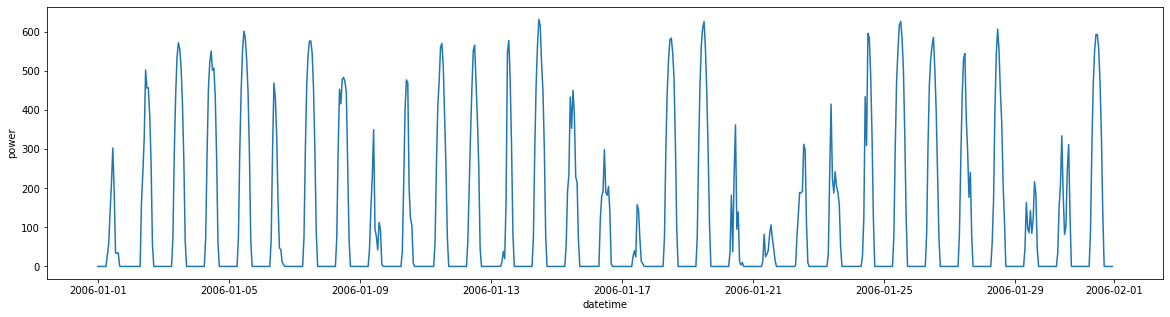

In [10]:
plt.figure(figsize=(20,5))
sns.lineplot(pv.loc[datetime(2006,1,1,00):datetime(2006,1,31,23)].index,
             pv.loc[datetime(2006,1,1,00):datetime(2006,1,31,23)]['power'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


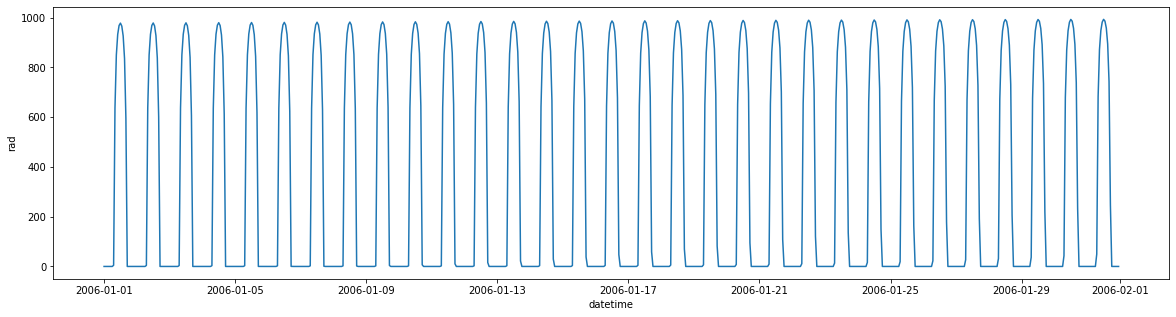

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(pv.loc[datetime(2006,1,1,00):datetime(2006,1,31,23)].index,
             pv.loc[datetime(2006,1,1,00):datetime(2006,1,31,23)]['rad'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


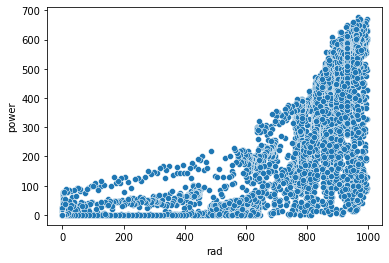

In [23]:
sns.scatterplot(pv['rad'], pv['power'])

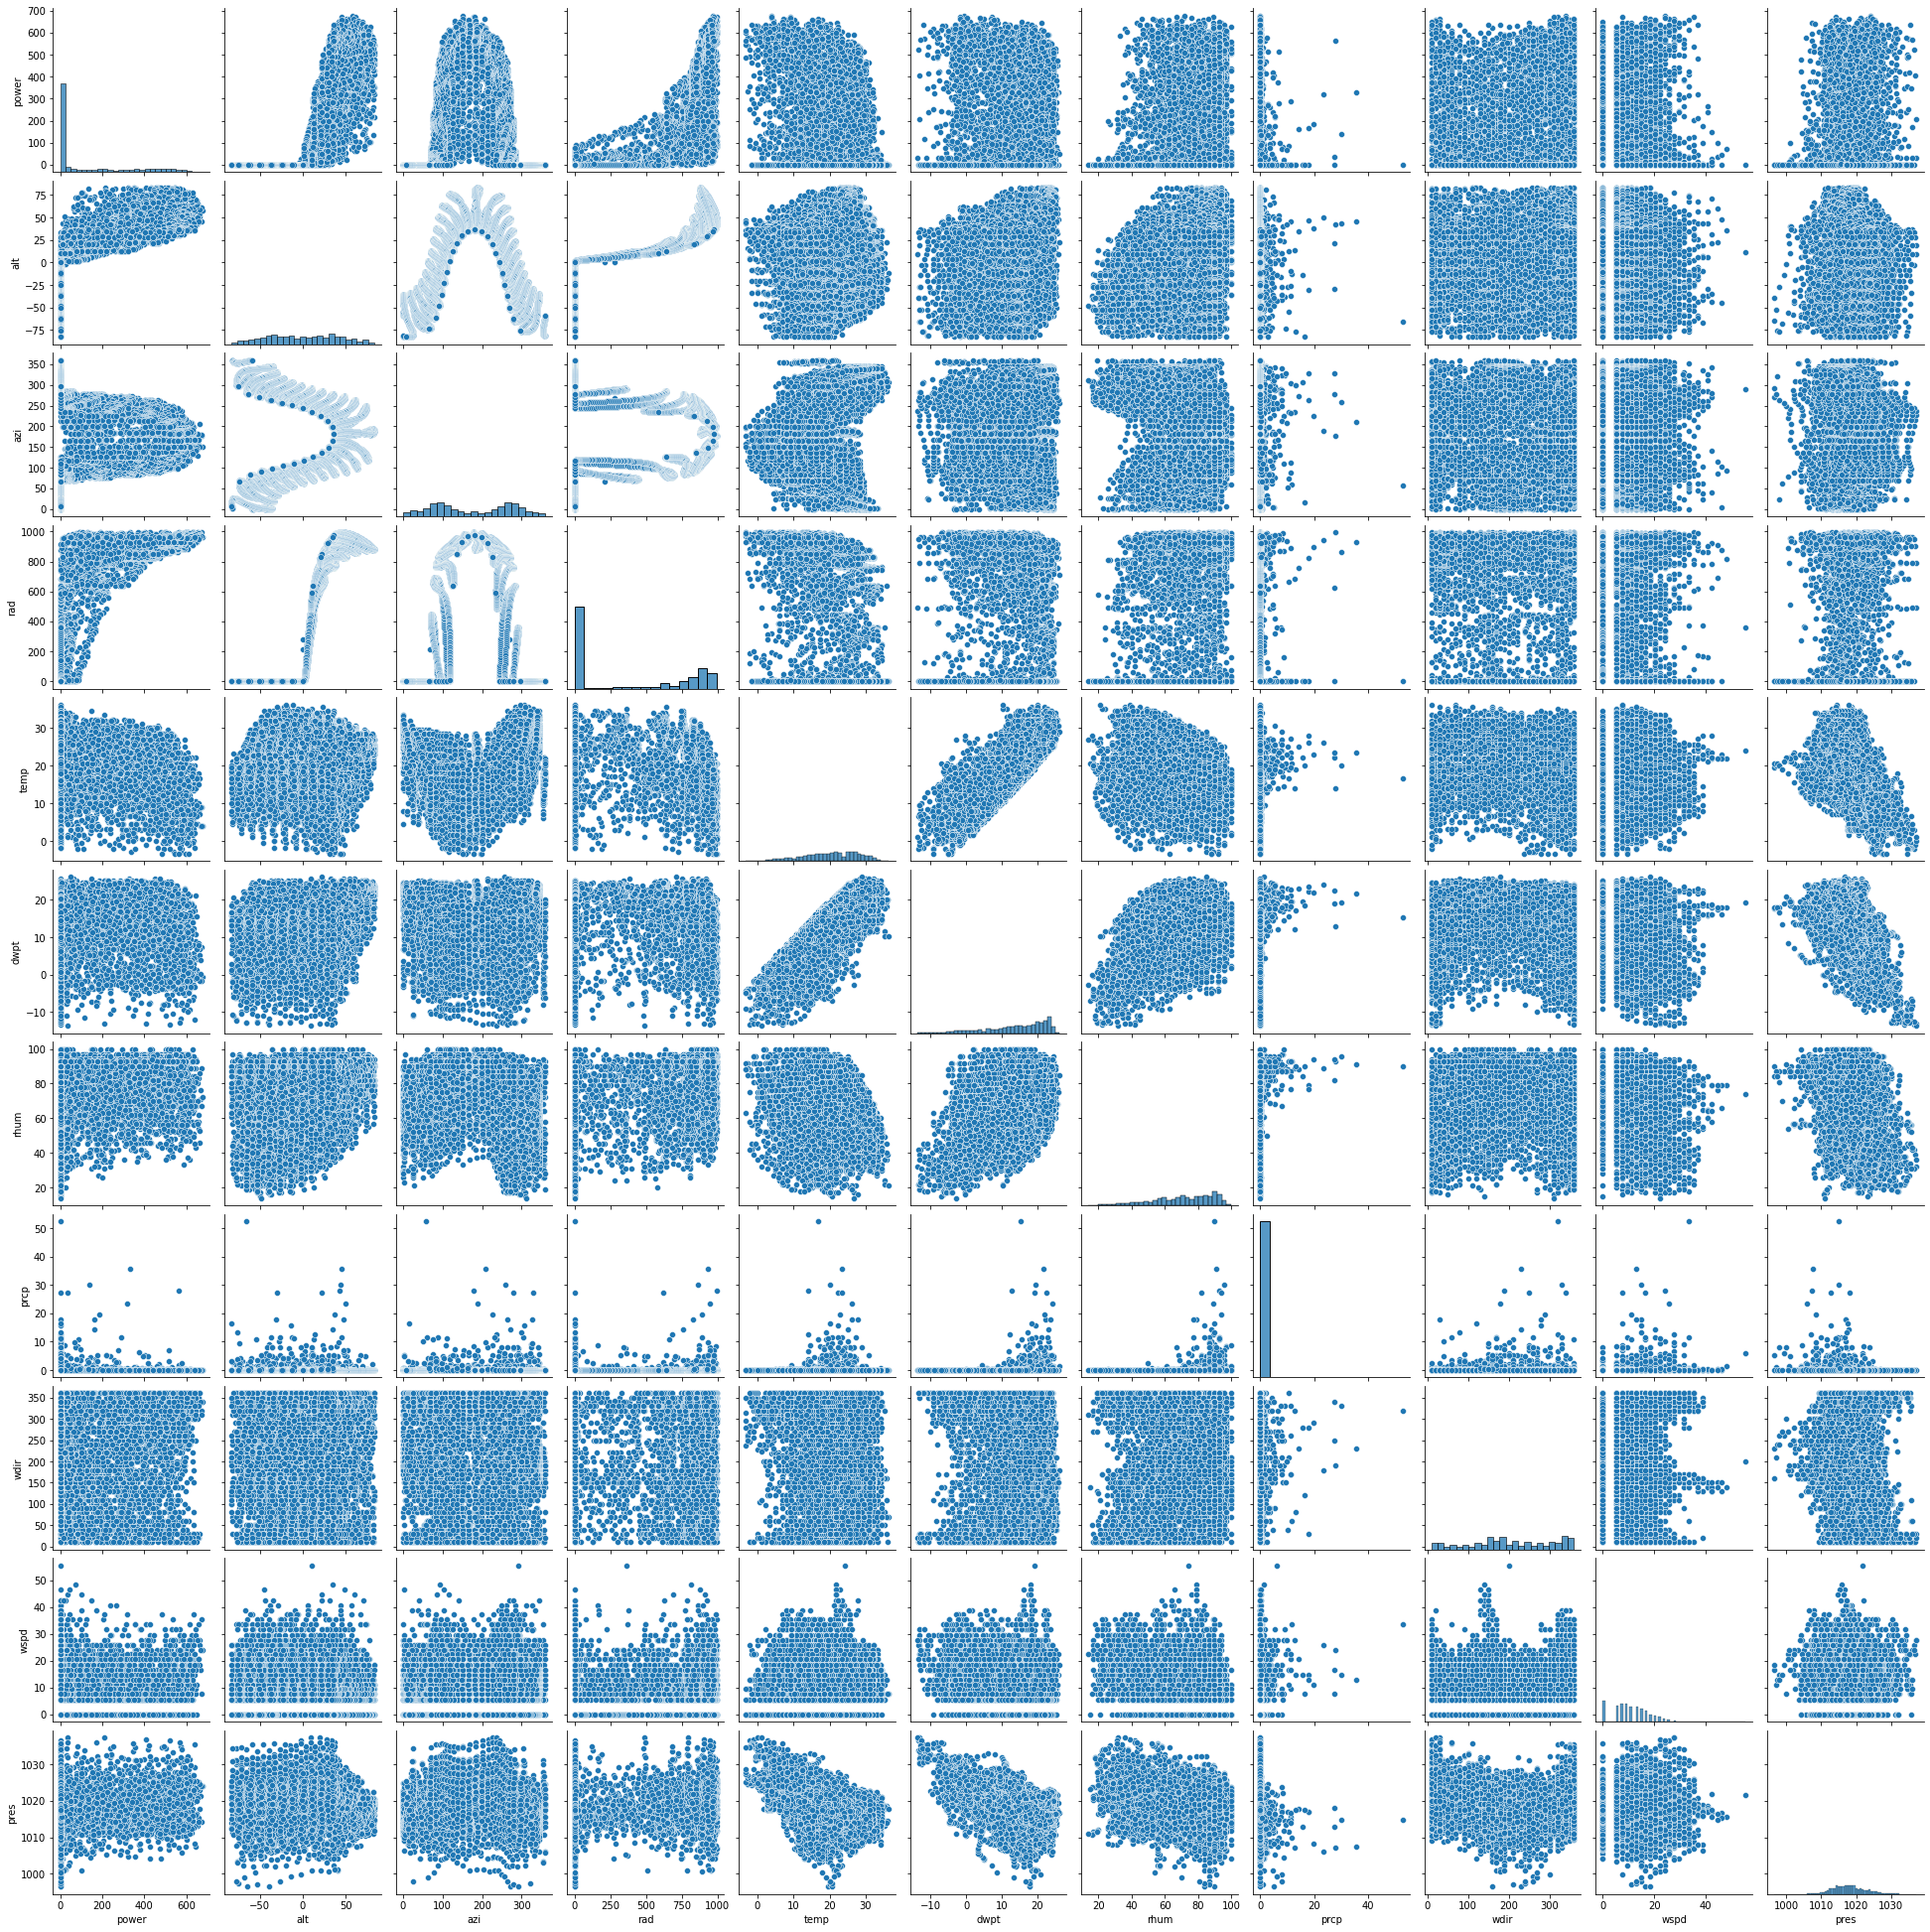

In [ ]:
sns.pairplot(pv[['power', 'alt', 'azi', 'rad', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']])

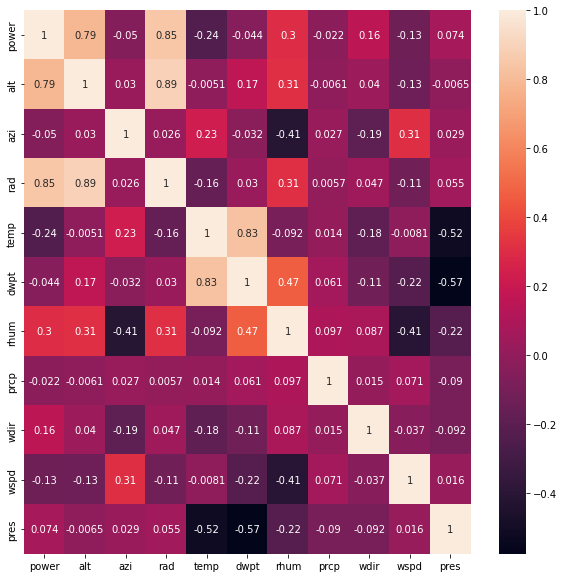

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(pv[['power', 'alt', 'azi', 'rad', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']].corr(),
            annot=True)

In [ ]:
with open('data/pv_imputation.pickle', 'wb') as f:
    pickle.dump(pv, f)

# hourly

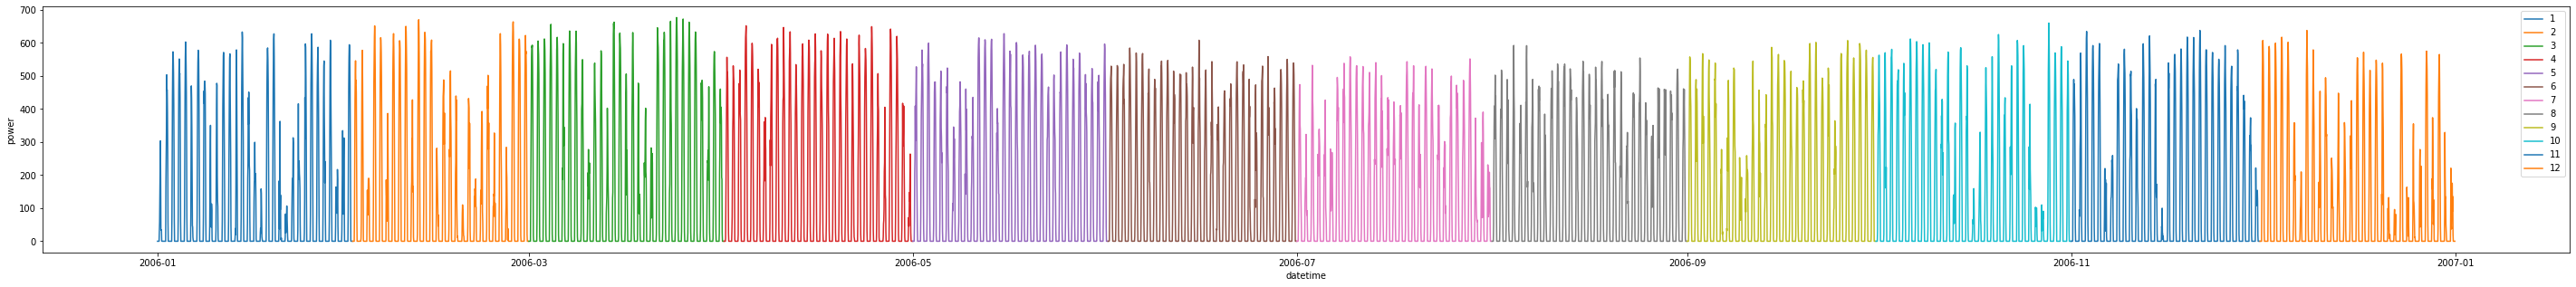

In [ ]:
plt.figure(figsize=(50,5))
sns.lineplot(x=pv[pv['month']==1]['datetime'], y=pv[pv['month']==1]['power'], label='1')
sns.lineplot(x=pv[pv['month']==2]['datetime'], y=pv[pv['month']==2]['power'], label='2')
sns.lineplot(x=pv[pv['month']==3]['datetime'], y=pv[pv['month']==3]['power'], label='3')
sns.lineplot(x=pv[pv['month']==4]['datetime'], y=pv[pv['month']==4]['power'], label='4')
sns.lineplot(x=pv[pv['month']==5]['datetime'], y=pv[pv['month']==5]['power'], label='5')
sns.lineplot(x=pv[pv['month']==6]['datetime'], y=pv[pv['month']==6]['power'], label='6')
sns.lineplot(x=pv[pv['month']==7]['datetime'], y=pv[pv['month']==7]['power'], label='7')
sns.lineplot(x=pv[pv['month']==8]['datetime'], y=pv[pv['month']==8]['power'], label='8')
sns.lineplot(x=pv[pv['month']==9]['datetime'], y=pv[pv['month']==9]['power'], label='9')
sns.lineplot(x=pv[pv['month']==10]['datetime'], y=pv[pv['month']==10]['power'], label='10')
sns.lineplot(x=pv[pv['month']==11]['datetime'], y=pv[pv['month']==11]['power'], label='11')
sns.lineplot(x=pv[pv['month']==12]['datetime'], y=pv[pv['month']==12]['power'], label='12')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


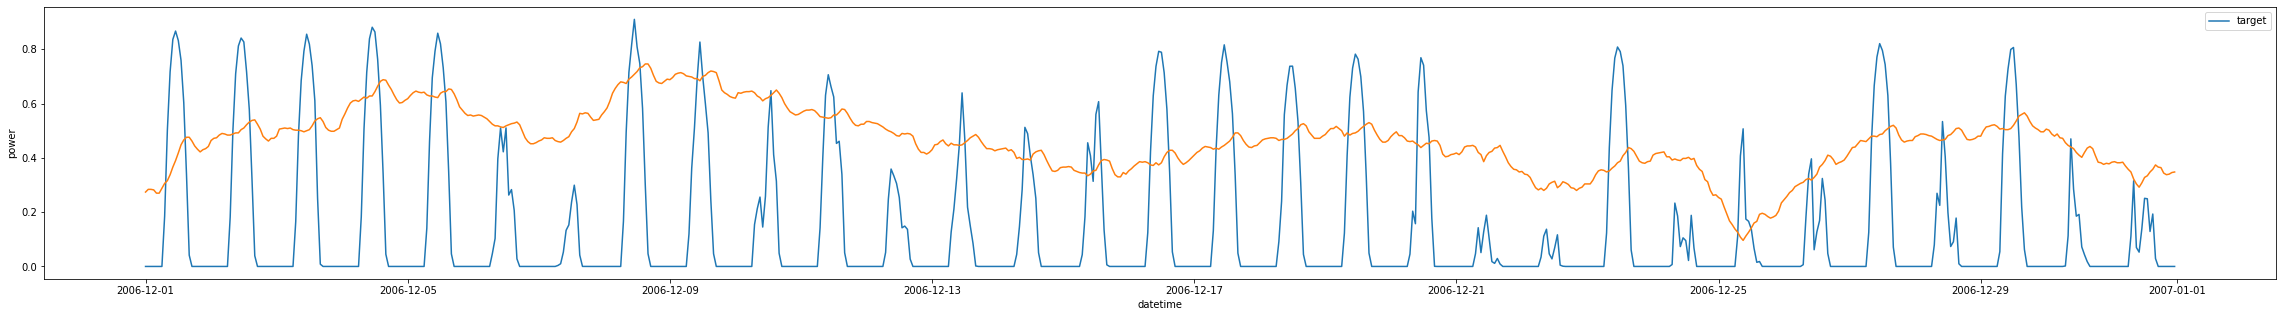

In [ ]:
plt.figure(figsize=(40,5))
month = 12
pv_temp = pv[pv['month']==month]
sns.lineplot(pv_temp['datetime'], pv_temp['power']/700, label='target')
# sns.lineplot(pv_temp['datetime'], pv_temp['rad']/1000)
# sns.lineplot(pv_temp['datetime'], pv_temp['temp']/40)
# sns.lineplot(pv_temp['datetime'], pv_temp['dwpt']/30)
# sns.lineplot(pv_temp['datetime'], pv_temp['rhum']/100)
# sns.lineplot(pv_temp['datetime'], pv_temp['prcp']/50)
# sns.lineplot(pv_temp['datetime'], pv_temp['wdir']/400)
# sns.lineplot(pv_temp['datetime'], pv_temp['wspd']/50)
sns.lineplot(pv_temp['datetime'], (pv_temp['pres']-1000)/50)

# daily

In [ ]:
pv_day = pv.groupby(['month', 'day']).mean().reset_index()
pv_day['datetime'] = [datetime(2006, pv_day['month'].iloc[i], pv_day['day'].iloc[i], 0) for i in range(pv_day.shape[0])]
pv_day['weekday'] = [i.weekday() for i in pv_day['datetime']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

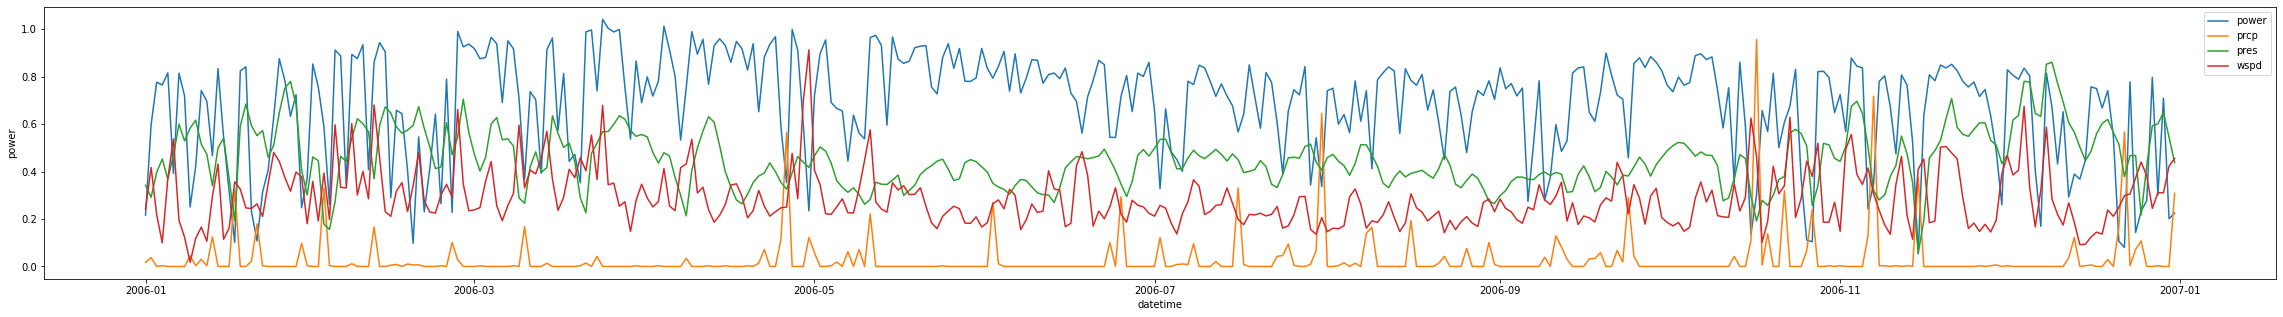

In [ ]:
plt.figure(figsize=(40,5))
sns.lineplot(pv_day['datetime'], pv_day['power']/200, label='power')
sns.lineplot(pv_day['datetime'], pv_day['prcp']/4, label='prcp')
sns.lineplot(pv_day['datetime'], (pv_day['pres']-1000)/40, label='pres')
sns.lineplot(pv_day['datetime'], pv_day['wspd']/40, label='wspd')

In [ ]:
with open('data/pv_daily.pickle', 'wb') as f:
    pickle.dump(pv_day, f)

# data split

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


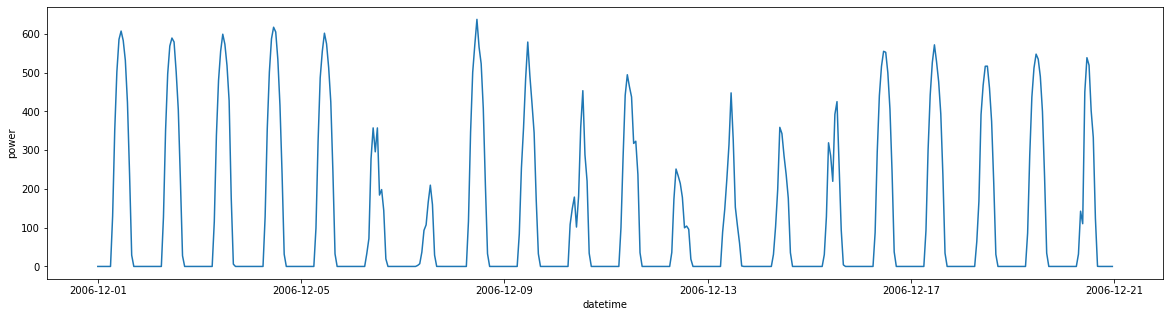

In [25]:
plt.figure(figsize=(20,5))
sns.lineplot(pv.loc[datetime(2006,12,1,00):datetime(2006,12,20,23)].index,
             pv.loc[datetime(2006,12,1,00):datetime(2006,12,20,23)]['power'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


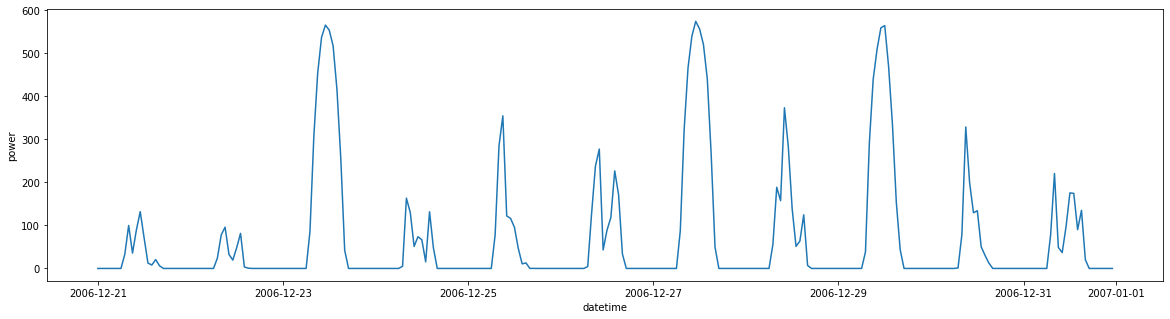

In [26]:
plt.figure(figsize=(20,5))
sns.lineplot(pv.loc[datetime(2006,12,21,00):datetime(2006,12,31,23)].index,
             pv.loc[datetime(2006,12,21,00):datetime(2006,12,31,23)]['power'])